# 8장. 정규분포 이야기

###  

__정규분포란?__  
- 실생활에서 길이 크기, 높이 등을 재는 것처럼 연속되어 있는 데이터를 다룰 때 <U>일반적으로 기대할 수 있는 값들의 분포</U>.(정규 분포를 특정지음.)
> 지금까지 다른 데이터는 이산데이터임

$  $

__이산데이터__  
- 슬롯 머신에서 수익이 정해진 금액들만 취하거나, 동전 던지기에서 앞면이 나온 횟수가 1, 2, 3 $⋯$ 등을 취하는 것처럼 특정 값들만 대상으로 하는 데이터를 일컬음.  

$  $

__연속 데이터__  
- 예를 들어, $X$가 한국 남성들의 키를 가리킬 때, 키는 175, 176, 178 $⋯$ 등의 값 이외에 175.1, 175.12, 176.003 $⋯$ 등 어느 구간 사이의 실수를 모두 취할 수 있다. 이런 경우의 데이터를 연속 데이터라 부른다.  

$  $

__일반적으로 기대할 수 있는 값들의 분포__의 의미  
- 한국 사람들의 키의 분포, 또는 미국 사람들의 몸무게의 분포, 한경대 학생들의 성적 평점의 분포, 한경대 컴퓨터공학과 학생들의 통학시간의 분포 등은 모두 정규분포를 따른다.
  - 이에 대한 이론은 존재하지 않는다. 다만 우리가 사는 우주에서는 정규분포가 일반적으로 성립한다.


#### 정규분포의 확률밀도함수(가우시안 함수) 곡선

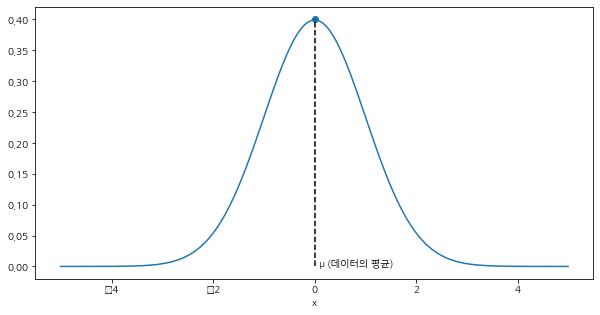

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", family='NanumGothic')


x = np.arange(-5, 5, 0.01)

def gaussian(x, mean, sigma):
  return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mean)**2 / (2 * sigma**2))

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)


plt.plot(x, gaussian(x, 0, 1))

plt.xlabel('x')
ax.scatter(0 ,0.4)
ax.annotate('μ (데이터의 평균)', xy=(0.1 ,0))
ax.plot([0,0],[0,0.4], color ='black', linewidth=1.5, linestyle="--")

plt.show()

__가우시안 함수 $G(X)$__  
- $G(X) = \frac{1}{σ \sqrt{2π}} ⋅ exp(-\frac{(x-\mu)^2}{2σ^2})$  
외우지 마세요 !
- 그래프의 폭은 $σ^2$에 의존한다.  
$σ^2$이 커질수록 납작하고 퍼진 모양이 된다.  
  - $σ^2$ : 데이터의 표준편차

$  $

위 그래프가 나타내는 정규분포를 $N(μ, σ^2)$으로 표기한다.  
그리고 $X$가 정규분포이면서 평균이 $\mu$이고 분산이 $σ^2$일 때 아래와 같이 표기한다.  
$X$ ~ $N(\mu, σ^2)$

### 정규분포의 확률밀도함수 곡선의 특징
① $σ^2$이 커지면 곡선은 넓고 평평해진다.  
② $σ^2$이 작아지면 곡선은 좁고 뾰족해진다.  
③ 곡선은 $x$축과 절대로 만나지 않는다. 하지만 평균에서 좌우로 멀어질 수록 점점 $x$축에 가까워진다.  
④ 곡선과 $x$축 사이의 면적은 항상 __1__이 된다.

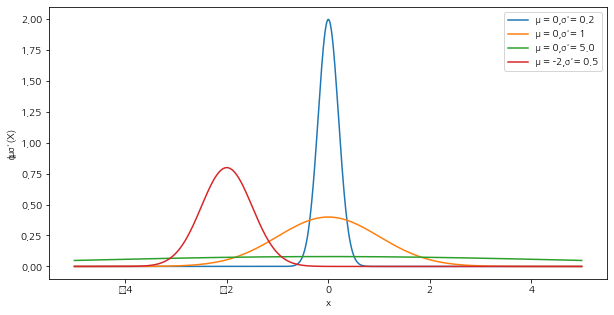

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", family='NanumGothic')

x = np.arange(-5, 5, 0.01)

def gaussian(x, mean, sigma):
  return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mean)**2 / (2 * sigma**2))

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x, gaussian(x, 0, 0.2))
plt.plot(x, gaussian(x, 0, 1))
plt.plot(x, gaussian(x, 0, 5.0))
plt.plot(x, gaussian(x, -2, 0.5))

legend = ['μ = 0,σ²= 0.2', 'μ = 0,σ²= 1', 'μ = 0,σ²= 5.0', 'μ = -2,σ²= 0.5']

plt.xlabel('x')
plt.ylabel('φμσ²(X)')
plt.legend(legend)

plt.show()

### 정규확률 구하기

$X$ ~ $N(\mu, σ^2)$일 때, $X$가 $a$와 $b$사이의 값을 취할 확률 $P(a<X<b)$는 ?
- 정답 : $X$의 확률밀도함수 곡선과 구간 $a$에서 $b$사이의 면적이다.

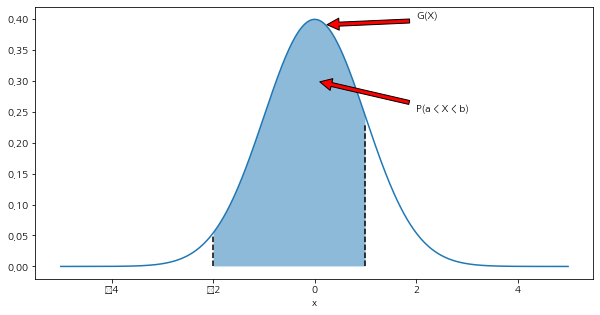

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rc("font", family='NanumGothic')


x = np.arange(-5, 5, 0.01)

def gaussian(x, mean, sigma):
  return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mean)**2 / (2 * sigma**2))

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)


plt.plot(x, gaussian(x, 0, 1))
plt.fill_between(x, norm.pdf(x,0,1),where=(x>=-2)&(x<=1), alpha=0.5)

plt.xlabel('x')

ax.annotate('G(X)', xy=(0.15 ,0.39), xytext=(2, 0.4),
            arrowprops=dict(facecolor='red', shrink=0.05))
ax.plot([-2,-2],[0,0.05], color ='black', linewidth=1.5, linestyle="--")
ax.annotate('P(a < X < b)', xy=(0 ,0.3), xytext=(2, 0.25),
            arrowprops=dict(facecolor='red', shrink=0.05))
ax.plot([1,1],[0,0.23], color ='black', linewidth=1.5, linestyle="--")

plt.show()

__✏️질문__ : 위 색칠된 면적을 어떻게 구하나 ? 
- 정규곡선 아래에 있는 면적을 직접 계산하는 일은 어렵다.(적분 활용).  
하지만 확률 테이블을 이용하면 쉽게 구할 수 있다.  
그리고 확률테이블을 이용하려면 표준화 과정을 거치면 된다. 

$  $

__정규확률 구하기 세 단계__  
① __분포 결정__ : $μ$와 $σ^2$확인  
② __표준화하기__ : 표준점수 구하기  
③ __확률 찾기__ : 확률 테이블 활용


__✏️ 예제__
##### 단계 ① : 분포 구하기  
- 20 ~ 24세 사이의 한국 남성들의 키를 $X$라 할 때, $X$의 평균은 173.5cm이고, 표준편차는 5.17cm이다.  
즉, $X$ ~ $N(173.5, (5.17)^2)$  

__문제 ①__  
키 180 이상의 남성을 소개팅에서 만날 확률 $P(X>180)$은 ?

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


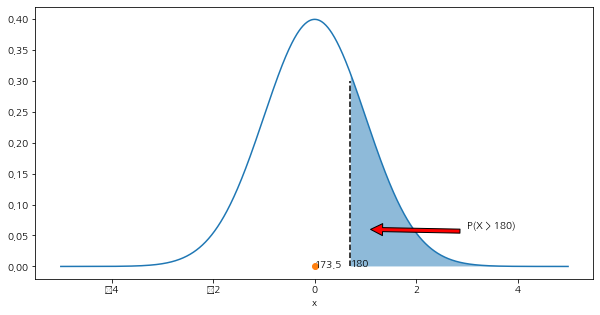

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rc("font", family='NanumGothic')


x = np.arange(-5, 5, 0.01)

def gaussian(x, mean, sigma):
  return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mean)**2 / (2 * sigma**2))

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)


plt.plot(x, gaussian(x, 0, 1))
plt.fill_between(x, norm.pdf(x,0,1),where=(x>=0.7), alpha=0.5)

plt.xlabel('x')

ax.scatter(0,0)
ax.annotate('173.5', xy=(0 ,0))
ax.annotate('180', xy=(0.7 ,0))
ax.annotate('P(X > 180)', xy=(1 ,0.06), xytext=(3, 0.06),
            arrowprops=dict(facecolor='red', shrink=0.05))
ax.plot([0.7,0.7],[0,0.3], color ='black', linewidth=1.5, linestyle="--")

plt.show()

__문제 ②__  
키 180 이상, 185 이하의 남성을 만날 확률 $P(180<X<185)$은 ?  

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


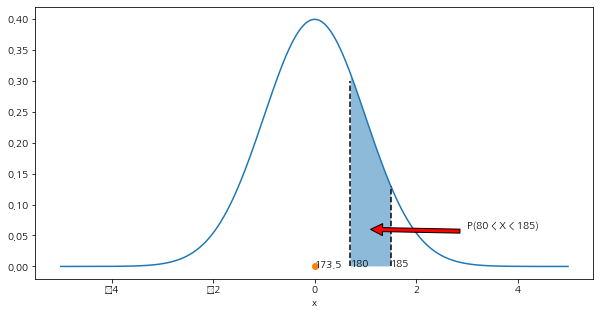

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rc("font", family='NanumGothic')


x = np.arange(-5, 5, 0.01)

def gaussian(x, mean, sigma):
  return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mean)**2 / (2 * sigma**2))

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)


plt.plot(x, gaussian(x, 0, 1))
plt.fill_between(x, norm.pdf(x,0,1),where=(x>=0.7)&(x<=1.5), alpha=0.5)

plt.xlabel('x')

ax.scatter(0,0)
ax.annotate('173.5', xy=(0 ,0))
ax.annotate('180', xy=(0.7 ,0))
ax.annotate('185', xy=(1.5 ,0))

ax.annotate('P(80 < X < 185)', xy=(1 ,0.06), xytext=(3, 0.06),
            arrowprops=dict(facecolor='red', shrink=0.05))

ax.plot([0.7,0.7],[0,0.3], color ='black', linewidth=1.5, linestyle="--")
ax.plot([1.5,1.5],[0,0.13], color ='black', linewidth=1.5, linestyle="--")

plt.show()

##### 단계 ② : $N(0,1)$로 표준화하기  
- $X$의 표준점수 점수는 다음과 같이 구한다.  
$Z = \frac{X-μ}{σ}$
  - $μ : X$의 평균값  
  $σ : X$의 표준편차  
  주의 : 이렇게 하면 $Z$는 표준정규분포를 따른다.  
  $Z$ ~ $N(0,1)$  

$  $

이제 180과 185의 표준 점수를 구하자.  
- 180의 표준점수 $= \frac{180-173.5}{5.17} = 1.26$
- 185의 표준점수 $= \frac{185-173.5}{5.17} = 2.22$ 

따라서 아래 식이 성립한다.  
$P(X>180) = P(Z>1.26)$  
$P(180<X185) = P(1.26<Z<2.22)$


##### 단계 ③ : 확률 테이블 이용하기  

확률 테이블은 $P(Z<a)$를 구할 때 활용!
- 주의 : 그래프와 $X$사의 면적은 1이다.

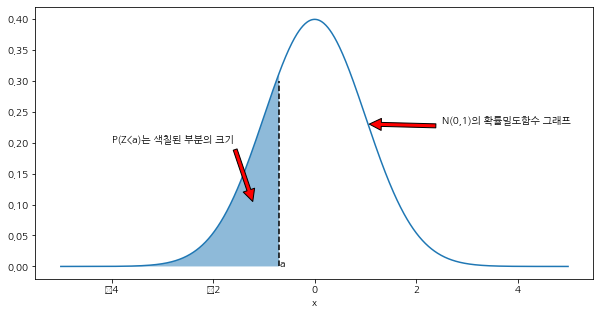

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rc("font", family='NanumGothic')


x = np.arange(-5, 5, 0.01)

def gaussian(x, mean, sigma):
  return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mean)**2 / (2 * sigma**2))

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)


plt.plot(x, gaussian(x, 0, 1))
plt.fill_between(x, norm.pdf(x,0,1),where=(x<=-0.7), alpha=0.5)

plt.xlabel('x')

ax.annotate('a', xy=(-0.7 ,0))

ax.annotate('N(0,1)의 확률밀도함수 그래프', xy=(1,0.23), xytext=(2.5, 0.23),
            arrowprops=dict(facecolor='red', shrink=0.05))
ax.annotate('P(Z<a)는 색칠된 부분의 크기', xy=(-1.2,0.1), xytext=(-4, 0.2),
            arrowprops=dict(facecolor='red', shrink=0.05))

ax.plot([-0.7,-0.7],[0,0.3], color ='black', linewidth=1.5, linestyle="--")

plt.show()

### 표준분포 확률테이블

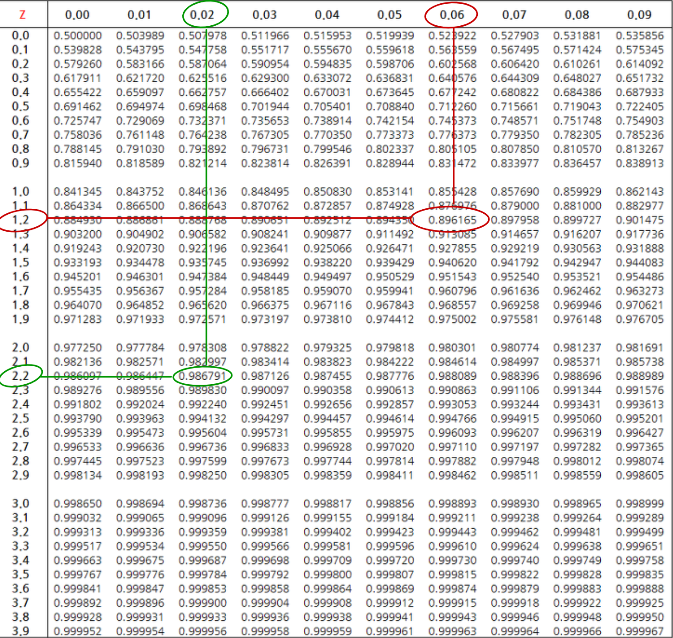

확률 테이블에 의해 아래 결과를 얻는다.  
$P(Z<1.26)≃0.896$  
$P(Z<2.22)≃0.987$  
이 결과를 이용하여 원하는 확률을 구할 수 있다. 먼저 다음 사항에 주의한다.

### 확률 테이블 사용법
① 확률 테이블은 $P(Z<a)$의 값을 보여줌  
② $P(Z>a) = 1- P(Z<a)$  
③ $P(a<Z<b) = P(Z<b)-P(Z<a)$







##### __문제해결__  
소개팅에서 키가 180이상 또는 180에서 185의 남성을 만날 확률 계산하기. 

💡 문제 ①의 답  
$P(X>180) = P(Z>1.26) = 1-P(Z<1.26) = 1-0.896 = 0.104$ (즉, 10.4%)

💡 문제 ②의 답
$P(180<X<185) = P(1.26<Z<2.22) = P(Z<2.22) - P(Z<1.26) = 0.987-0.896 = 0.091$ (즉, 9.1%)

### 정규분포 활용하기 요점  
① 정규분포를 따른다는 사실 확인  
② 평균과 분산 확인  
③ 정규분포로 표준화(표준점수 활용)  
④ 확률 테이블을 활용하여 원하는 확률 구하기


- __주의사항__  
연속 데이터를 다룰 때 특정 값을 가질 확률은 구하지 않는다.  
예를 들어, 소개팅에서 키가 정확히 180cm인 남성을 만날 확률은 0이다.  
즉 연속 데이터의 경우 일반적으로 다음 식이 성립한다.  
$P(X=a)=0$ 